<a href="https://colab.research.google.com/github/saurav3380/music-recommendation/blob/main/Music_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')



df= pd.read_csv('https://gist.githubusercontent.com/rioto9858/ff72b72b3bf5754d29dd1ebf898fc893/raw/1164a139a780b0826faef36c865da65f2d3573e0/top50MusicFrom2010-2019.csv')
print(df.head(10))


                                        title         artist  \
0                            Hey, Soul Sister          Train   
1                        Love The Way You Lie         Eminem   
2                                     TiK ToK          Kesha   
3                                 Bad Romance      Lady Gaga   
4                        Just the Way You Are     Bruno Mars   
5                                        Baby  Justin Bieber   
6                                    Dynamite      Taio Cruz   
7                                     Secrets    OneRepublic   
8  Empire State of Mind (Part II) Broken Down    Alicia Keys   
9                    Only Girl (In The World)        Rihanna   

  the genre of the track  year  Beats.Per.Minute -The tempo of the song  \
0             neo mellow  2010                                       97   
1        detroit hip hop  2010                                       87   
2              dance pop  2010                                      12

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 14 columns):
 #   Column                                                                         Non-Null Count  Dtype 
---  ------                                                                         --------------  ----- 
 0   title                                                                          603 non-null    object
 1   artist                                                                         603 non-null    object
 2   the genre of the track                                                         603 non-null    object
 3   year                                                                           603 non-null    int64 
 4   Beats.Per.Minute -The tempo of the song                                        603 non-null    int64 
 5   Energy- The energy of a song - the higher the value, the more energtic         603 non-null    int64 
 6   Danceability - The higher the valu

In [ ]:
df.isnull().sum()

title                                                                            0
artist                                                                           0
the genre of the track                                                           0
year                                                                             0
Beats.Per.Minute -The tempo of the song                                          0
Energy- The energy of a song - the higher the value, the more energtic           0
Danceability - The higher the value, the easier it is to dance to this song      0
Loudness/dB - The higher the value, the louder the song                          0
Liveness - The higher the value, the more likely the song is a live recording    0
Valence - The higher the value, the more positive mood for the song              0
Length - The duration of the song                                                0
Acousticness - The higher the value the more acoustic the song is                0
Spee

In [ ]:
df.shape

(603, 14)

In [ ]:
df.info()

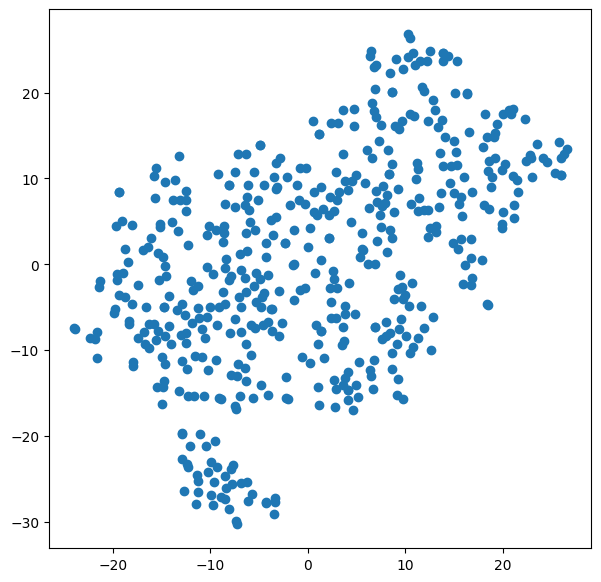

In [ ]:
from sklearn.manifold import TSNE

a=df.drop(['title','artist','the genre of the track'],axis=1)

model=TSNE(n_components=2, random_state=0)
tsne_data=model.fit_transform(a.head(500))
plt.figure(figsize=(7,7))
plt.scatter(tsne_data[:,0],tsne_data[:,1])
plt.show()


In [ ]:
df['title'].nunique(), df.shape

(584, (603, 14))

In [ ]:
df = df.sort_values(by=['Popularity- The higher the value the more popular the song is'], ascending=False)
df.drop_duplicates(subset=['title'], keep='first', inplace=True)

In [ ]:
df['title'].nunique(), df.shape

(584, (584, 14))

In [ ]:
plt.figure(figsize = (10, 5))
sb.countplot(df['year'])
plt.axis('off')
plt.show()

In [ ]:
df.info()

In [ ]:
track=df.drop(['year'],axis=1)

floats = []
for col in track.columns:
  if track[col].dtype == 'int':
    floats.append(col)

len(floats)

10

In [ ]:
df.info()

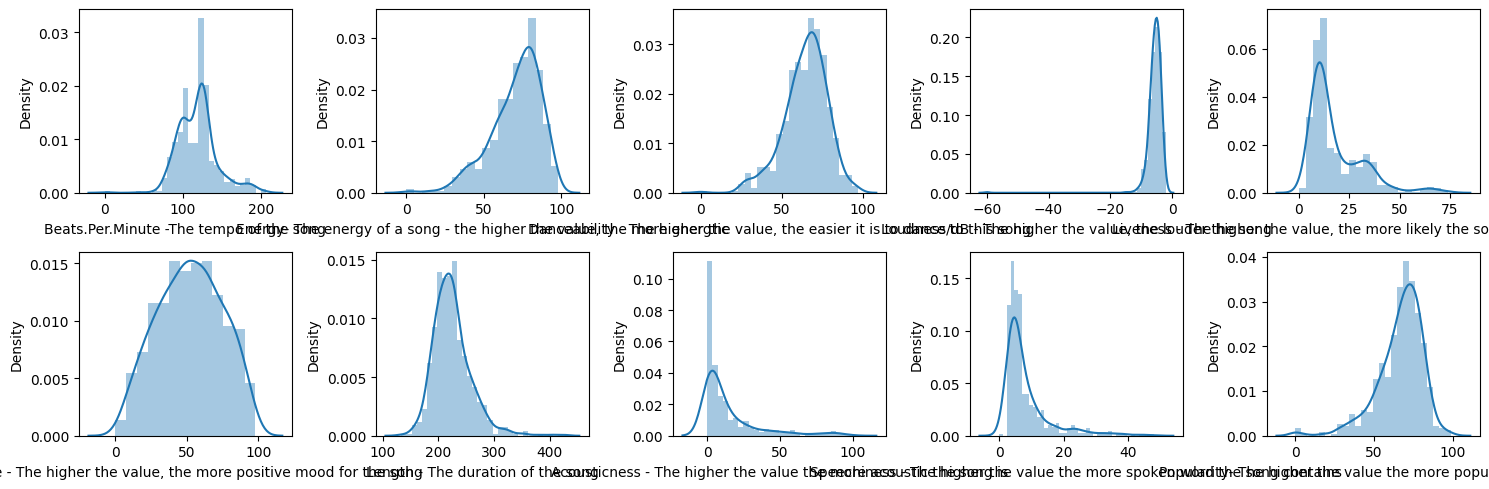

In [ ]:
plt.subplots(figsize = (15, 5))
for i, col in enumerate(floats):
  plt.subplot(2, 5, i + 1)
  sb.distplot(track[col])
plt.tight_layout()
plt.show()

In [ ]:
%%capture
song_vectorizer = CountVectorizer()
song_vectorizer.fit(df['the genre of the track'])

In [ ]:

df = df.sort_values(by=['Popularity- The higher the value the more popular the song is'], ascending=False).head(10000)

In [ ]:
def get_similarities(song_name, data):

  # Getting vector for the input song.
  text_array1 = song_vectorizer.transform(data[data['title']==song_name]['the genre of the track']).toarray()
  num_array1 = data[data['title']==song_name].select_dtypes(include=np.number).to_numpy()

  # We will store similarity for each row of the dataset.
  sim = []
  for idx, row in data.iterrows():
    name = row['title']

    # Getting vector for current song.
    text_array2 = song_vectorizer.transform(data[data['title']==name]['the genre of the track']).toarray()
    num_array2 = data[data['title']==name].select_dtypes(include=np.number).to_numpy()

    # Calculating similarities for text as well as numeric features
    text_sim = cosine_similarity(text_array1, text_array2)[0][0]
    num_sim = cosine_similarity(num_array1, num_array2)[0][0]
    sim.append(text_sim + num_sim)

  return sim

In [ ]:
def recommend_songs(song_name, data=df):
  # Base case
  if df[df['title'] == song_name].shape[0] == 0:
    print('This song is either not so popular or you\
    have entered invalid_name.\n Some songs you may like:\n')

    for song in data.sample(n=5)['title'].values:
      print(song)
    return

  data['similarity_factor'] = get_similarities(song_name, data)

  data.sort_values(by=['similarity_factor', 'Popularity- The higher the value the more popular the song is'],
                   ascending = [False, False],
                   inplace=True)

  # First song will be the input song itself as the similarity will be highest.
  display(data[['title', 'artist']][2:7])

In [ ]:

recommend_songs('Love The Way You Lie')

,title,artist
530,Him & I (with Halsey),G-Eazy
379,"Me, Myself & I",G-Eazy
551,Lemon,N.E.R.D
339,See You Again (feat. Charlie Puth),Wiz Khalifa
15,OMG (feat. will.i.am),Usher
